# 이미지 데이터 셋을 이용한 CNN Modeling
> # Gooogle Drive Mount

## Dogs and Cats Image_Data

- Train_Data : 2000(1000_Dogs, 1000_Cats)
- Valid_Data : 1000(500_Dogs, 500_Cats)
- Test_Data : 1000(500_Dogs, 500_Cats)


# Import Tensorflow & Keras

- import TensorFlow

In [1]:
import tensorflow as tf
tf.__version__

'2.4.1'

- GPU 설정 확인

In [13]:
print('GPU Information -', tf.test.gpu_device_name(), '\n')

!nvidia-smi

GPU Information - /device:GPU:0 

Tue Mar 23 01:55:45 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    26W /  70W |    222MiB / 15109MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                      

- import Keras

In [2]:
import keras
keras.__version__

'2.4.3'

# 1. Google Drive Mount

- 'dogs_and_cats_small.zip' 디렉토리를 구글드라이브에 업로드

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- 마운트 결과 확인

In [4]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Mar  4 04:51 '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


# 2. Data Processing



> ## 1) Unzip 'dogs_and_cats_small.zip'

In [6]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip
  inflating: test/cats/cat.1501.jpg  
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat.1518.jpg  
  inflating: test/cats/cat.1519.jpg  
  inflating: test/cats/cat.1520.jpg  
  inflating: test/cats/cat.1521.jpg  
  inflating: test/cats/cat.1522.jpg  
  inflating: test/cats/cat.1523.jpg  
  inflating: test/cats/cat.1524.jpg  
  inf

In [7]:
!ls -l

total 20
drwx------ 6 root root 4096 Mar 23 01:45 drive
drwxr-xr-x 1 root root 4096 Mar 18 13:36 sample_data
drwxr-xr-x 4 root root 4096 Mar 23 01:47 test
drwxr-xr-x 4 root root 4096 Mar 23 01:47 train
drwxr-xr-x 4 root root 4096 Mar 23 01:47 validation


> ## 2) Image_File Driectory Setting

- train_dir
- valid_dir
- test_dir

In [8]:
train_dir = 'train'       # train 이미지 2000장은 train 디렉터리에 
valid_dir = 'validation'  # valid 이미지 1000장은 valid 디렉터리에
test_dir = 'test'         # test 이미지 1000장은 test 디렉터리에

> ## 3) ImageDataGenerator( ) & flow_from_directory( )

- Nomalization
   - ImageDataGenerator( )
- Resizing & Generator
   - flow_from_directory( )

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255) # 정규화 해서 객체 지정
valid_datagen = ImageDataGenerator(rescale = 1./255) 

train_generator = train_datagen.flow_from_directory( # 디렉터리로부터 데이터 가져오기
                  train_dir,
                  target_size = (150, 150),          # 이미지 크기 일정하게 설정
                  batch_size = 20,                   # 2000장 중에서 한번에 20장씩 부르기
                  class_mode = 'binary')             # 고양이는 0, 강아지는 1로 라벨링

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

# 다중분류는 class_mode = 'categorical'

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


> ## 4) Test train_generator : generator 잘 됐는지 확인

In [11]:
for data_batch, labels_batch in train_generator:
  print('배치 데이터 크기 : ', data_batch.shape)  # 20장씩, 150x150x3크기의 컬러이미지
  print('배치 레이블 크기 : ', labels_batch.shape)# 20장씩
  break

배치 데이터 크기 :  (20, 150, 150, 3)
배치 레이블 크기 :  (20,)


# 3. CNN Keras Modeling

> ## 1) Model Define

- Feature Extraction Layer : Convolution Layer 쌓기 
- Classification

In [16]:
# CNN
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3))) # 3x3 크기의 filter가 32개
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu')) # 3x3 크기의 filter가 64개
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))  # 3x3 크기의 filter가 128개
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))  # 3x3 크기의 filter가 128개
model.add(layers.MaxPool2D((2,2)))

# DNN 
model.add(layers.Flatten())                                # 1차원으로 피고, 
model.add(layers.Dense(units = 512, activation = 'relu'))  # 6272 *512 + 512
model.add(layers.Dense(units = 1, activation = 'sigmoid')) # 512 * 1 + 1 

# filters, kernel_size, pool_size 생략하고 바로 내용 씀

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

> ## 2) Model Compile

- 모델 학습방법 설정

In [18]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
# 이진분류

> ## 3) Model Fit

- 약 분

In [19]:
%%time

hist_dandc = model.fit(train_generator,         # train data는 train_generator로 
                       steps_per_epoch = 100,   # 2000장을 20개씩 꺼내기로 했으니까 전부 보려면 100번 돌려야 함. 이게 한번의 epoch
                       epochs = 60,             # 위 과정을 60번 반복
                       validation_data = valid_generator, # valid data는 train_generator로 돌리자 
                       validation_steps = 50)   # 1000장을 20개씩 꺼내기로 했으니까 전부 보려면 50번 돌려야 함. 이게 한번의 epoch

Epoch 1/60
100/100 [==============================] - 42s 89ms/step - loss: 0.7023 - accuracy: 0.4775 - val_loss: 0.6924 - val_accuracy: 0.4990
Epoch 2/60
100/100 [==============================] - 9s 87ms/step - loss: 0.6927 - accuracy: 0.5151 - val_loss: 0.6762 - val_accuracy: 0.5000
Epoch 3/60
100/100 [==============================] - 9s 88ms/step - loss: 0.6854 - accuracy: 0.5225 - val_loss: 0.6929 - val_accuracy: 0.5010
Epoch 4/60
100/100 [==============================] - 9s 89ms/step - loss: 0.6930 - accuracy: 0.5205 - val_loss: 0.6919 - val_accuracy: 0.5570
Epoch 5/60
100/100 [==============================] - 9s 92ms/step - loss: 0.6890 - accuracy: 0.5465 - val_loss: 0.6635 - val_accuracy: 0.6070
Epoch 6/60
100/100 [==============================] - 9s 90ms/step - loss: 0.6433 - accuracy: 0.6210 - val_loss: 0.7657 - val_accuracy: 0.6100
Epoch 7/60
100/100 [==============================] - 9s 89ms/step - loss: 0.6011 - accuracy: 0.6788 - val_loss: 0.5939 - val_accuracy: 0.687

> ## 4) 학습 결과 시각화 

- Loss Visualization

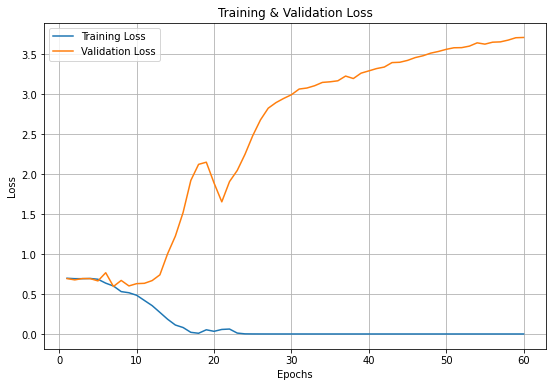

In [21]:
import matplotlib.pyplot as plt
epochs = range(1, len(hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_dandc.history['loss'])
plt.plot(epochs, hist_dandc.history['val_loss'])
plt.title('Training & Validation Loss')
# plt.ylim(0, 0.4)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()
# overfitting 경향이 있다. 

- Accuary Visualization

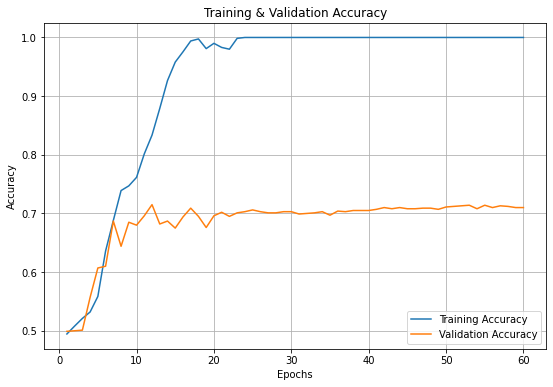

In [23]:
import matplotlib.pyplot as plt
epochs = range(1, len(hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_dandc.history['accuracy'])
plt.plot(epochs, hist_dandc.history['val_accuracy'])
plt.title('Training & Validation Accuracy')
# plt.ylim(0, 0.4)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show() 

> ## 5) Model Evaluate : test data로 돌려보자

- test_generator 

In [24]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                  test_dir,
                  target_size = (150, 150),
                  batch_size = 20,                     # valid data와 같이 나눔
                  class_mode = 'binary')

Found 1000 images belonging to 2 classes.


- Loss & Accuracy

In [26]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50)           # 전부 돌리기 위해 50번 진행(valid와 동일)
                                                      # epoch = 한번
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))
# test data에서 accuracy = 0.70700 나옴 (낮음)
# loss 높은 편

50/50 [==============================] - 3s 56ms/step - loss: 3.4630 - accuracy: 0.7070
Loss = 3.46305
Accuracy = 0.70700


# 4. Model Save & Load to Google Drive

> ## 1) Google Drive Mount

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> ## 2) Model Save

In [28]:
model.save('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [29]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 44820
-rw------- 1 root root  4353288 Mar 19 08:32 001_best_mnist.h5
-rw------- 1 root root    34592 Mar 17 07:32 001_model_iris.h5
drwx------ 2 root root     4096 Mar 19 08:32 002_best_mnist.h6
-rw------- 1 root root 41498896 Mar 23 02:27 002_dogs_and_cats_small.h5
drwx------ 2 root root     4096 Mar 19 08:33 003_best_mnist.h7


> ## 3) Model Load

In [30]:
from keras.models import load_model
model_small = load_model('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [32]:
loss, accuracy = model_small.evaluate(test_generator, 
                                      steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 55ms/step - loss: 3.4630 - accuracy: 0.7070
Loss = 3.46305
Accuracy = 0.70700


### 
#The End
###